In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import collections # Lib to count values

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # Lib to fit the power law curve

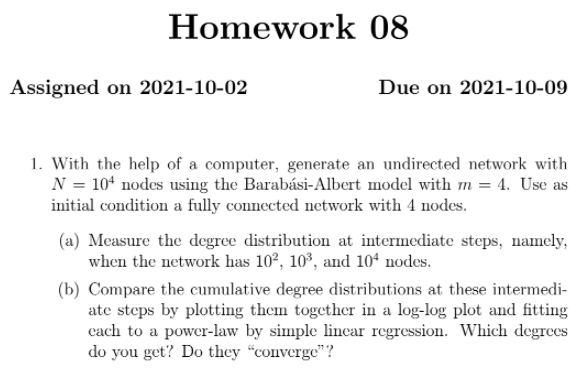

<h3 align="center">  Creating the Barabási Graph </h3>

In [2]:
# Create a inicial graph to barabasi (with 4 nodes totally connected)
G_complet = nx.complete_graph(4)

In [3]:
# Edges for each new node
m = 4

# Make a barashi graph with a full conected original graph (N=4)
G_complet = nx.complete_graph(4)

# Creating a barabasi graph using the another.
G_2 = nx.barabasi_albert_graph(10**2, m, initial_graph=G_complet, seed=2021)
G_3 = nx.barabasi_albert_graph(10**3, m, initial_graph=G_2, seed=2021)
G_4 = nx.barabasi_albert_graph(10**4, m, initial_graph=G_3, seed=2021)

In [4]:
# Other way to create the barabasi is creating a subgraph with 10^3 nodes from the graph with 10^4
H = G_4.subgraph(np.arange(10**3))

<h3 align="center">Degree distribution </h3>

In [5]:
def degree_distribution(G):
    """
    G: A graph 
    
    This function recives a graph and return the list of degrees that graph G contains and a list a probability to 
    select a node with this degree when chosen randomly.
    """
    degs = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = collections.Counter(degs) # Count how many times each degree apears

    list_uniq_degrees = np.unique(degs) # List with unique degree

    list_prob_degree = [] # List with probability of each degree

    for deg_dist in dict_deg_distribution: # Loop to get the degree distribution
        list_prob_degree.append(dict_deg_distribution[deg_dist]/len(degs))
        
    return list_uniq_degrees, degs, list_prob_degree

In [6]:
def degree_cumulative(G):
    """
    G: A graph
    
    This function return a list with cumulative values of degree (how much nodes have degree biggest that each node),
    a list of each degree that appears in the graph G and da list with probability to find each degree.
    """
    
    list_uniq_degrees, degs, list_prob_degree = degree_distribution(G)
    
    dict_cumulative_degree = {} # Dict with how many nodes are degree equal or bigest that

    for deg in list_uniq_degrees:
        dict_cumulative_degree[deg] = np.count_nonzero(deg <= degs)

    list_cumulative_prob = list(map(lambda x: (x[1]/len(degs)), dict_cumulative_degree.items()))
    
    return list_cumulative_prob, list_uniq_degrees, list_prob_degree

In [7]:
def plot_degree_probability(G):
    '''  
    G: graph to find and plot hte degree distribution
    
    This function count how many times each degree apears on the graph
    and calculate the probability to a node has to get this dregee
    '''
    
    deg = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = collections.Counter(deg) # Count how many times each degree apears
    
    list_prob_degree = [] # List with probability of each degree
    for deg_dist in dict_deg_distribution:
        list_prob_degree.append(dict_deg_distribution[deg_dist]/len(deg))
    
    # Ploting the distribution
    plt.bar(list(dict_deg_distribution.keys()), list_prob_degree, 0.35)
    plt.title('Degree probability distribution of the graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    
    return list_prob_degree

In [8]:
all_cumulatives = [] # List with the cumulative values for each Graph 
all_unique_degrees = [] # List with each degree wit heach graph contain
all_prob_degree = [] # List with the pK of node of each Graph
    
for graph in [G_2, G_3, G_4]: # Loop for extract the metric from each graph

    list_cumulative_prob, list_uniq_degrees, list_prob_degree = degree_cumulative(graph)
    all_cumulatives.append(list_cumulative_prob)
    all_unique_degrees.append(list_uniq_degrees)
    all_prob_degree.append(list_prob_degree)

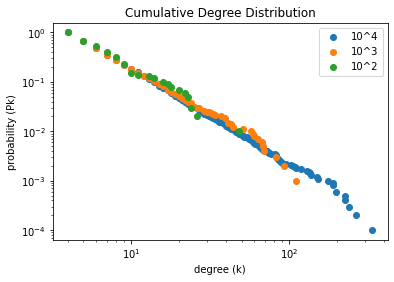

In [9]:
# Plotting the degree distribution

plt.scatter(all_unique_degrees[2], all_cumulatives[2], label='10^4')
plt.scatter(all_unique_degrees[1], all_cumulatives[1], label='10^3')
plt.scatter(all_unique_degrees[0], all_cumulatives[0], label='10^2')
# plt.plot(lin_reg.predict(predict_to_plot))

plt.xscale("log")
plt.yscale("log")
plt.title('Cumulative Degree Distribution')
plt.xlabel('degree (k)')
plt.ylabel('probability (Pk)')
# plt.ylim(min(all_cumulatives[0]))

plt.legend()

The degree distribution follows a scale free distribution (wit ha long tail) where the number of nodes (N) shows the expected behavior.

<h3 align="center">Degree distribution with Power law guide line</h3>

In [10]:
# Function to calculate de power law
def power_law(x, a, b):
    return a * np.power(x, -b)

In [11]:
# Calculating the regression to power law distribution for each Barabasi Graph
popt2, pcov2 = curve_fit(power_law, all_unique_degrees[0], all_cumulatives[0])
popt3, pcov3 = curve_fit(power_law, all_unique_degrees[1], all_cumulatives[1])
popt4, pcov4 = curve_fit(power_law, all_unique_degrees[2], all_cumulatives[2])

all_popt = [popt2, popt3, popt4]

In [12]:
def plot_cumulative_plots(axs, N, Ns, pK, popt, color):
    """
    axs: Axis to subplot
    N: The degree to predict the degree using power law 
    Ns: List of 10^ to set the title of each graph
    pK: Degree probability obtained from the graph
    popt: The regression coefficients (to make predict of the pK using power law)
    color: Color to use in the plot
    
    This function plot a subgraph with a degree distribution obtained from the graph and a line obtained from the
    power law regression.
    """
    axs.scatter(N, pK, label=Ns, color=color)
    axs.loglog(N, power_law(N, * popt), color)
    axs.set_title(f'N = {Ns}')
    axs.set_xscale('log')
    axs.set_yscale('log')
    axs.set_xlabel('log(k)')
    axs.set_ylabel('log(Pk)')


The Power Law regression for the degree 48: 
 N=10^2 = -4.3266399509706295 
 N=10^3 = -4.5855496456537015 
 N=10^4 = -4.623490535574351 

The Power Law regression for the degree 110: 
 N=10^2 = -5.7730822092489245 
 N=10^3 = -6.1171478900432374 
 N=10^4 = -6.16814584746477 

The Power Law regression for the degree 336: 
 N=10^2 = -7.720727424422988 
 N=10^3 = -8.179456271302067 
 N=10^4 = -8.248035666832696 



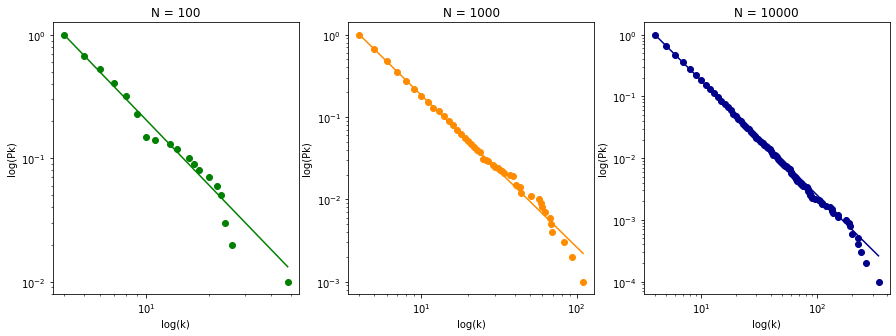

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

Ns = [10**2, 10**3, 10**4]
colors = ['green', 'darkorange', 'darkblue']
axs = [ax1, ax2, ax3]

for N in range(len(all_unique_degrees)):
    plot_cumulative_plots(axs[N], all_unique_degrees[N], Ns[N], all_cumulatives[N], all_popt[N], colors[N])
    
    print(f'The Power Law regression for the degree {max(all_unique_degrees[N])}: \n N=10^2 = {np.log(power_law(max(all_unique_degrees[N]), *popt2))} \n N=10^3 = {np.log(power_law(max(all_unique_degrees[N]), *popt3))} \n N=10^4 = {np.log(power_law(max(all_unique_degrees[N]), *popt4))} \n')


How these networks follows the barabasi Albert model your growth are constant (the m factor define how much links each node has), is possible to see it using the power law regression where the points (pk values in the graphs) follow the line.

In [14]:
print('The power law regression follows a tendenci off growing similiry when compared the degrees probability (pK)'+
      f', \n For example the degree {min(all_unique_degrees[0])} where the pK in graph is {np.log( min(all_cumulatives[0]))} and'+
      f' in the regression is {np.log(power_law(max(all_unique_degrees[0]), *popt2))}')

The power law regression follows a tendenci off growing similiry when compared the degrees probability (pK), 
 For example the degree 4 where the pK in graph is -4.605170185988091 and in the regression is -4.3266399509706295


<h3 align="center"> All plotings in same image</h3>

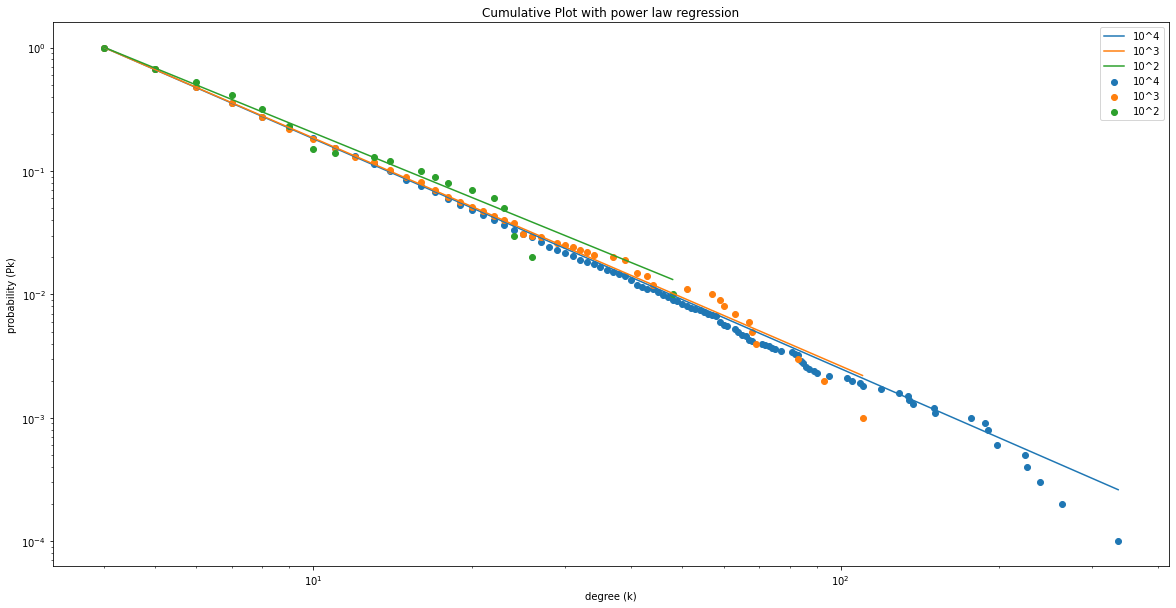

In [15]:
# Plotting the degree distribution
plt.figure(figsize=(20, 10))
plt.scatter(all_unique_degrees[2], all_cumulatives[2], label='10^4')
plt.scatter(all_unique_degrees[1], all_cumulatives[1], label='10^3')
plt.scatter(all_unique_degrees[0], all_cumulatives[0], label='10^2')

# Plotting the regression line (all together)
plt.loglog(all_unique_degrees[2], power_law(all_unique_degrees[2], *popt4), label='10^4')
plt.loglog(all_unique_degrees[1], power_law(all_unique_degrees[1], *popt3), label='10^3')
plt.loglog(all_unique_degrees[0], power_law(all_unique_degrees[0], *popt2), label='10^2')

plt.xscale("log")
plt.yscale("log")
plt.title('Cumulative Plot with power law regression')
plt.xlabel('degree (k)')
plt.ylabel('probability (Pk)')

plt.legend()
plt.show()

The graphs shows that the N turn bigger the regressions are converging for same point 